In [1]:
import gym
import random
from matplotlib import pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
! pip install -e ../

Obtaining file:///C:/Users/icybee/PycharmProjects/gym-chinese-chess
  Found existing installation: gym-chinese-chess 0.0.1
    Uninstalling gym-chinese-chess-0.0.1:
      Successfully uninstalled gym-chinese-chess-0.0.1
  Running setup.py develop for gym-chinese-chess


# 中国象棋gym环境使用demo
## 1.创建一个中国象棋环境

In [3]:
chinese_chess_env = gym.make('gym_chinese_chess:cchess-v0')

C:\ProgramData\Anaconda3\lib\site-packages\gym-0.17.1-py3.7.egg\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


## 2.查看开局盘面

In [5]:
print(chinese_chess_env.render())


 9俥傌象士将士象傌俥
 8．．．．．．．．．
 7．砲．．．．．砲．
 6卒．卒．卒．卒．卒
 5．．．．．．．．．
 4．．．．．．．．．
 3兵．兵．兵．兵．兵
 2．炮．．．．．炮．
 1．．．．．．．．．
 0车马相仕帅仕相马车
  ａｂｃｄｅｆｇｈｉ




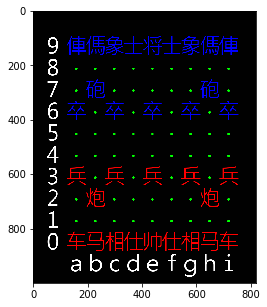

In [6]:
plt.figure(figsize=(5,5))
plt.imshow(chinese_chess_env.generate_image())

## 3.获取当前局面下的所有可能走法

In [7]:
actions = chinese_chess_env.get_possible_actions()

## 4.随机走一步

In [8]:
observation,reward,done,info = chinese_chess_env.step(actions[0])

## 5.查看刚刚随机走的一步具体是什么

In [9]:
chinese_chess_env.action2move(actions[0])

'a3a4'

## 6.查看刚刚随机走完之后的局面

In [10]:
print(chinese_chess_env.render())


 9俥傌象士将士象傌俥
 8．．．．．．．．．
 7．砲．．．．．砲．
 6卒．卒．卒．卒．．
 5．．．．．．．．卒
 4．．．．．．．．．
 3兵．兵．兵．兵．兵
 2．炮．．．．．炮．
 1．．．．．．．．．
 0车马相仕帅仕相马车
  ａｂｃｄｅｆｇｈｉ




## 7.利用中国象棋gym环境进行随机自对弈

In [11]:
chinese_chess_env.reset()
moves = []
while True:
    actions = chinese_chess_env.get_possible_actions()
    rand_action = random.choice(actions)
    moves.append(chinese_chess_env.action2move(rand_action))
    #print(chinese_chess_env.render())
    #print(chinese_chess_env.action2move(rand_action))
    observation,reward,done,info = chinese_chess_env.step(rand_action)
    if done:
        break

## 8.查看对弈的最后5个局面

In [12]:
for one_obs,one_move in zip(info["history"][-5:],moves[-5:]):
    print(one_move)
    print(one_obs.print_pos())

g4h4

 9．．象士将士象傌俥
 8．．．．．．．．．
 7俥．炮．．．．．．
 6卒．卒．．．．．卒
 5．砲．．兵．．．．
 4．．．．．．卒．．
 3兵．兵．．．兵．兵
 2．．．．．炮．．．
 1．．．．．．．车．
 0车马相仕帅仕．砲．
  ａｂｃｄｅｆｇｈｉ


e0e1

 9．炮．士．士象傌俥
 8．俥．．将．．．．
 7．．．砲．．．．．
 6卒．卒．．．卒．卒
 5．．兵．．．．．．
 4．．．．卒．．炮．
 3兵．．．．．兵．兵
 2．．．．．．砲．车
 1．．．．．．．．．
 0车马相仕帅仕相．．
  ａｂｃｄｅｆｇｈｉ


g3g4

 9．．象士将士象傌俥
 8．．．．．．．．．
 7俥．炮．．．．．．
 6卒．．．．．．．卒
 5．砲卒．兵．．．．
 4．．．．．．卒．．
 3兵．兵．．．兵．兵
 2．．．．．炮．．．
 1．．．．帅．．车．
 0车马相仕．仕．砲．
  ａｂｃｄｅｆｇｈｉ


e5d5

 9．炮．士．士象傌俥
 8．俥．．将．．．．
 7．．．砲．．．．．
 6卒．卒．．．卒．卒
 5．．兵．．．．．．
 4．．．．．卒兵炮．
 3兵．．．．．．．兵
 2．．．．．．砲．车
 1．．．．．．．．．
 0车马相仕帅仕相．．
  ａｂｃｄｅｆｇｈｉ


e0e8

 9．．象士．士象傌俥
 8．．．．．．．．．
 7俥．炮．．．．．．
 6卒．．．．．．．卒
 5．砲卒兵．．．．．
 4．．．．．．卒．．
 3兵．兵．．．兵．兵
 2．．．．．炮．．．
 1．．．．将．．车．
 0车马相仕．仕．砲．
  ａｂｃｄｅｆｇｈｉ




## 9.查看环境的observation space和action space

In [13]:
chinese_chess_env.observation_space

Box(6, 10, 9)

In [14]:
# 实际上游戏的action space由9 * 10的棋盘的笛卡尔积（90 * 90）和一个认输的action构成
chinese_chess_env.action_space

Discrete(8100)

## 10.查看observation数组

In [15]:
# 6个历史盘面，每个都是根据子力编码
observation.shape

(6, 10, 9)

In [16]:
observation[0]

array([[ 0.,  0., -3., -4.,  0., -4., -3., -2., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  0.,  7.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-6.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -6.],
       [ 0., -7., -6.,  6.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -6.,  0.,  0.],
       [ 6.,  0.,  6.,  0.,  0.,  0.,  6.,  0.,  6.],
       [ 0.,  0.,  0.,  0.,  0.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -5.,  0.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  4.,  0.,  4.,  0., -7.,  0.]])